In [1]:
!pip install yfinance
!mamba install bs4 -y


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4']

[+] 0.0s
pkgs/main/linux-64 ━━━━━━━━━━━╸━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.0s
p

In [2]:
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup

<h1>Question 1: Use yfinance to Extract Stock Data</h1>

Reset the index, save, and display the first five rows of the <code>tesla_data</code> dataframe using the <code>head</code> function. 

In [3]:
tesla_stock = yf.Ticker("TSLA")
tesla_history = tesla_stock.history(period="max")
tesla_data = pd.DataFrame(tesla_history)
tesla_data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


 <h1>Question 2: Use Webscraping to Extract Tesla Revenue Data</h1>

Display the last five rows of the <code>tesla_revenue</code> dataframe using the <code>tail</code> function. Upload a screenshot of the results.

In [4]:
html_Tesla = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm").text

In [5]:
soup_Tesla = BeautifulSoup(html_Tesla)

In [6]:
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])

In [7]:
for row in soup_Tesla.find( "tbody" ).find_all( "tr" ) :
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    tesla_revenue = tesla_revenue.append({"Date":date,"Revenue":revenue}, ignore_index = True)

    
tesla_revenue.tail(5)

,Date,Revenue
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


<h1>Question 3: Use yfinance to Extract Stock Data</h1>

Reset the index, save, and display the first five rows of the <code>gme_data</code> dataframe using the <code>head</code> function.

In [8]:
gme_stock = yf.Ticker("GME")
gme_history = gme_stock.history(period="max")
gme_data = pd.DataFrame(gme_history)

In [9]:
gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


<h1> Question 4: Use Webscraping to Extract GME Revenue Data </h1>

Display the last five rows of the <code>gme_revenue</code> dataframe using the <code>tail</code> function

In [10]:
html_gme = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html").text
soup_gme = BeautifulSoup(html_gme)


In [11]:
gme_revenue = pd.DataFrame(columns=["Date","Revenue"])
for row in soup_gme.find( "tbody" ).find_all( "tr" ) :
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    gme_revenue = gme_revenue.append({"Date":date,"Revenue":revenue}, ignore_index = True)

    
gme_revenue.tail(5)

,Date,Revenue
11,2009,"$8,806"
12,2008,"$7,094"
13,2007,"$5,319"
14,2006,"$3,092"
15,2005,"$1,843"


<h1> Question 5: Plot Tesla Stock Graph </h1>

Use the <code>make_graph</code> function to graph the Tesla Stock Data, also provide a title for the graph.

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [13]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [14]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [15]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [20]:
tesla_data.reset_index(inplace=True)

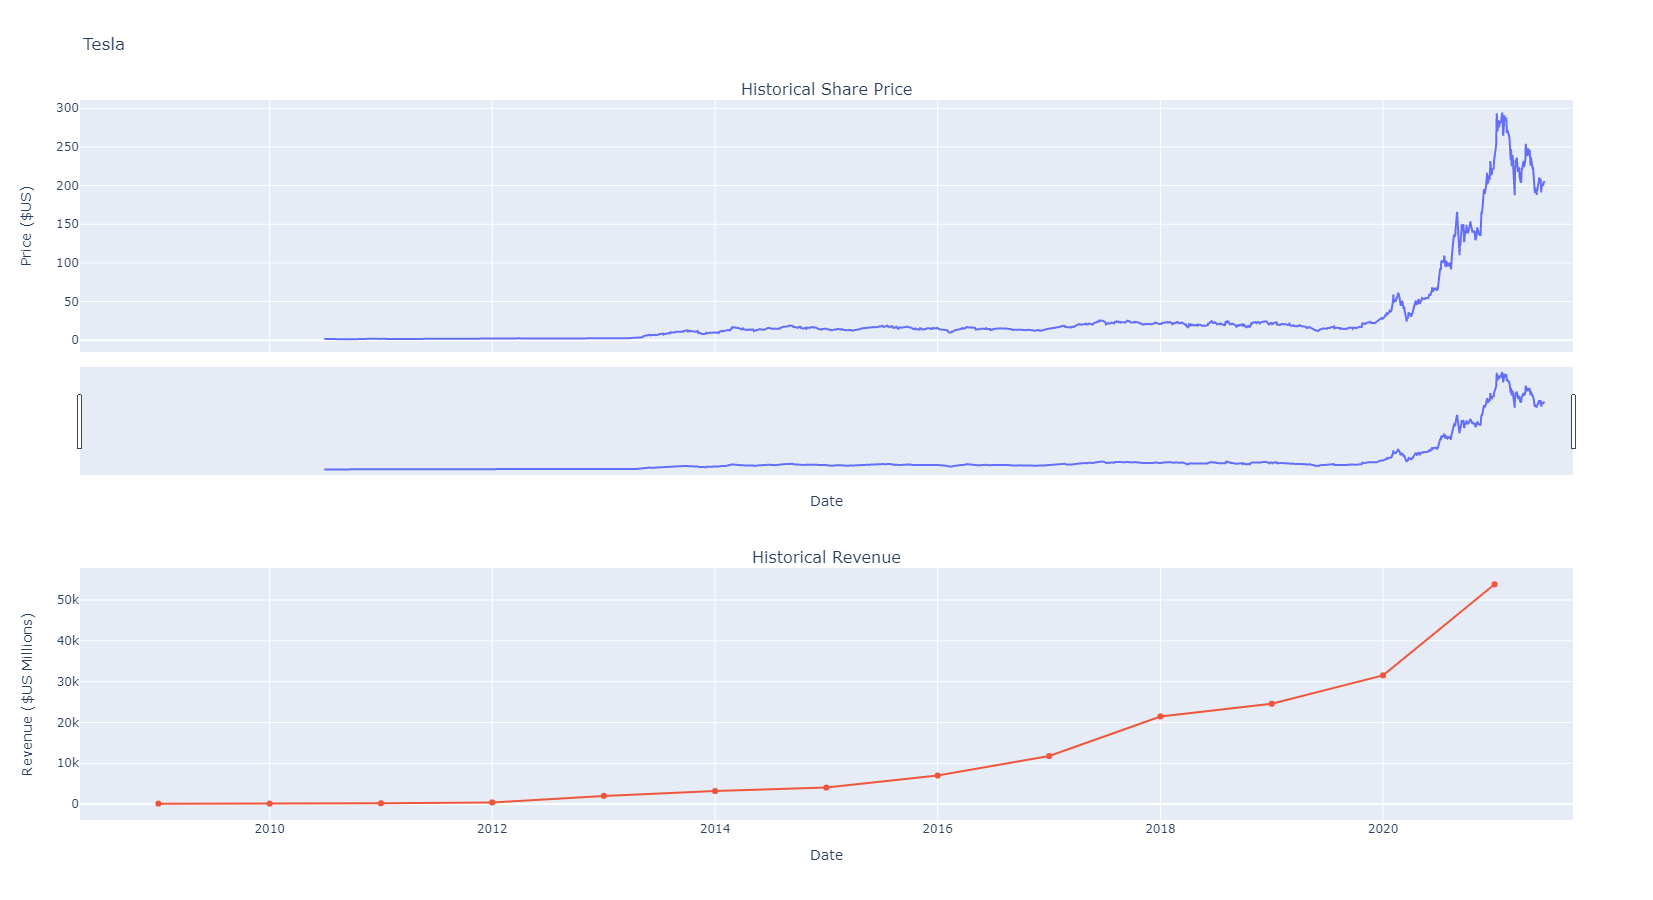

In [21]:
make_graph(tesla_data, tesla_revenue, "Tesla")

<h1>Question 6: Plot GameStop Stock Graph</h1>

Use the <code>make_graph</code> function to graph the GameStop Stock Data, also provide a title for the graph.

In [22]:
gme_data.reset_index(inplace=True)

In [23]:
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$',"")

,level_0,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,1,1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2,2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,3,3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,4,4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
5,5,5,2002-02-21 00:00:00-05:00,1.656319,1.670626,1.641169,1.658002,6976800,0.0,0.0
6,6,6,2002-02-22 00:00:00-05:00,1.670626,1.670626,1.615920,1.628545,3525600,0.0,0.0
7,7,7,2002-02-25 00:00:00-05:00,1.624337,1.653794,1.605821,1.641169,3453600,0.0,0.0
8,8,8,2002-02-26 00:00:00-05:00,1.632753,1.658002,1.606663,1.641169,2761600,0.0,0.0
9,9,9,2002-02-27 00:00:00-05:00,1.628545,1.629386,1.599088,1.611712,4091200,0.0,0.0


In [24]:
make_graph(gme_data, gme_revenue, "Game Stop")

ValueError: could not convert string to float: '$6,466'